# Exercise 4.9:- Intro to data Visualization with Python - Task - Part2
In this script the following steps are performed
1. Create a histogram using the column oder_hour_of_day
2. Create a bar chart from the loyalty_flag column
3. Line chart with prices column and order_hour_of_day
4. Line chart between the age and number of dependants
5. Scatterplot between Age and income
6. Export the visualizations to local folder as png

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import the latest order, product, customers dataset from exercise 4.9 trail notebook

In [2]:
path = r'C:\Users\sorna\Desktop\Data Analysis\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, '02.Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int32   
 1   product_id              int32   
 2   product_name            object  
 3   aisle_id                int16   
 4   department_id           int8    
 5   prices                  float32 
 6   order_id                int32   
 7   user_id                 int32   
 8   eval_set                object  
 9   order_number            int8    
 10  order_dow               int8    
 11  order_hour_of_day       int8    
 12  days_since_prior_order  float32 
 13  add_to_cart_order       int16   
 14  reordered               int8    
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  Busiest days            object  
 19  busiest_period_of_day   object  
 20  max_order               int8    
 21  loyalt

In [5]:
#downcast the numeric columns
df = df.apply(lambda col: 
            pd.to_numeric(col, downcast='float')
                            if col.dtype == 'float64'
                            else col)

In [6]:
df = df.apply(lambda col :
            pd.to_numeric(col, downcast='integer')
                            if col.dtype == 'int64'
                            else col)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int32   
 1   product_id              int32   
 2   product_name            object  
 3   aisle_id                int16   
 4   department_id           int8    
 5   prices                  float32 
 6   order_id                int32   
 7   user_id                 int32   
 8   eval_set                object  
 9   order_number            int8    
 10  order_dow               int8    
 11  order_hour_of_day       int8    
 12  days_since_prior_order  float32 
 13  add_to_cart_order       int16   
 14  reordered               int8    
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  Busiest days            object  
 19  busiest_period_of_day   object  
 20  max_order               int8    
 21  loyalt

In [8]:
#Export the downcasted dataset for use in future exercises
df.to_pickle(os.path.join(path, '02.Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

In [5]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'Busiest days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'Spending_flag', 'order_freq_median',
       'order_freq_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'Date_joined', 'Number_of_dependents', 'Family_status', 'Income'],
      dtype='object')

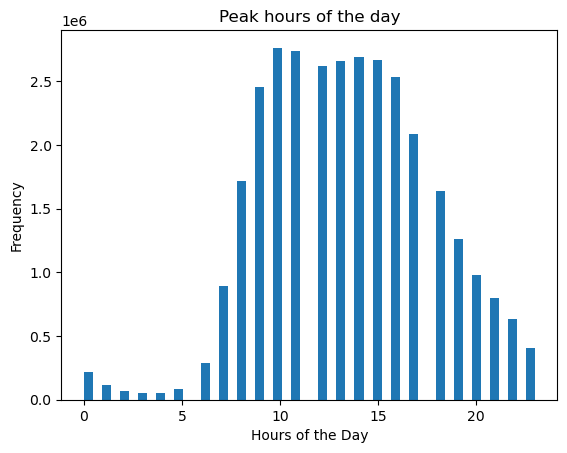

In [7]:
hist = df['order_hour_of_day'].plot.hist(bins = 50, title = 'Peak hours of the day')
plt.xlabel('Hours of the Day')
plt.ylabel('Frequency')
plt.show()

In [8]:
hist.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Hist_order_hour_of_day'))

# There are maximum orders received during the day time 8 to 17 hrs. 

# Bar chart for loyalty_flag

In [9]:
df.groupby(['loyalty_flag']).user_id.nunique()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Loyal Customers count')

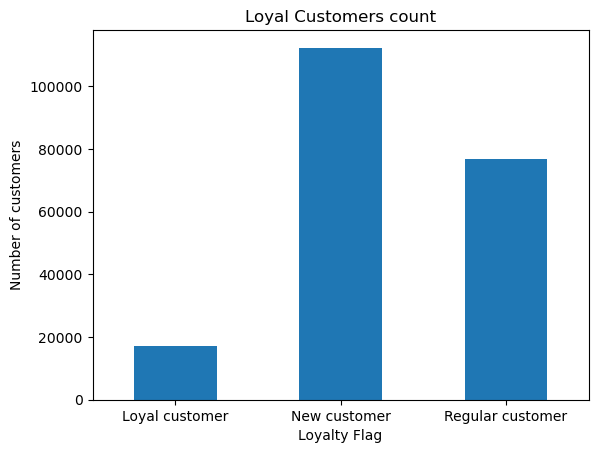

In [10]:
#ax = df['loyalty_flag'].value_counts().plot.bar(title = 'Loyal customers count')
ax=df.groupby(['loyalty_flag']).user_id.nunique().plot.bar(title = 'Loyal customers count')

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

# Add axis labels and title
ax.set_xlabel('Loyalty Flag')
ax.set_ylabel('Number of customers')
ax.set_title('Loyal Customers count')


In [11]:
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Bar_loyalty_flag.png'))

In [12]:
#Sample the dataset for creating the charts
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
df.shape

(32404859, 35)

In [15]:
big = df[dev]
small = df[~dev]

In [16]:
len(big)

22683761

In [17]:
len(small)

9721098

In [18]:
len(big)+ len(small)

32404859

In [19]:
df_2 = small[['order_hour_of_day', 'prices']]

In [20]:
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


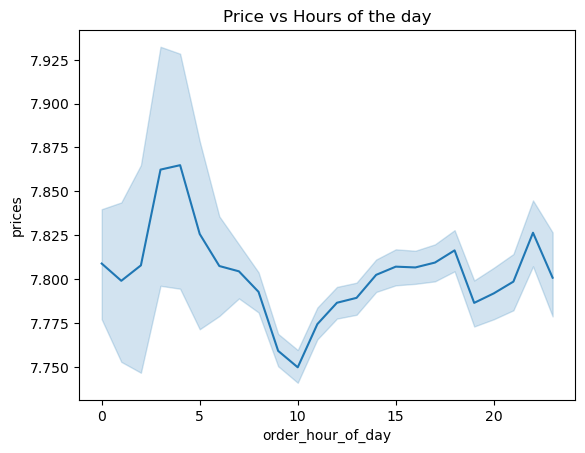

In [21]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Price vs Hours of the day')
plt.show()

# 06. Line chart for age and number of dependants

In [23]:
df_3 = small[['Age', 'Number_of_dependents']]

In [24]:
df_3

,Age,Number_of_dependents
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32404841,59,1
32404842,39,0
32404843,53,2
32404849,66,0


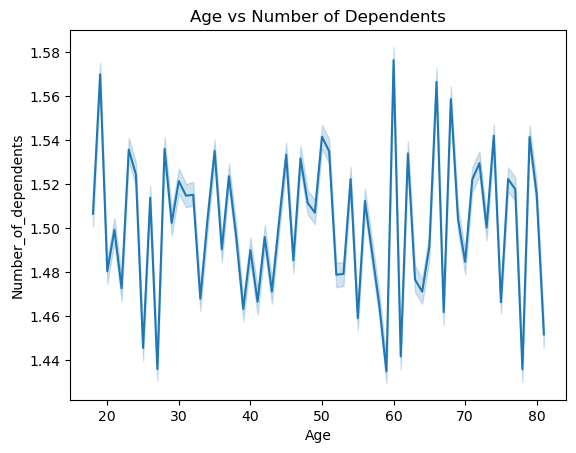

In [25]:
line1 = sns.lineplot(data = df_3, x = 'Age',y = 'Number_of_dependents')
plt.title('Age vs Number of Dependents')
plt.show()

# There is no clear,proper corelation between Age and Number of dependents.

# Scatterplot between age and income.

In [26]:
df_4 = small[['Age', 'Income']]

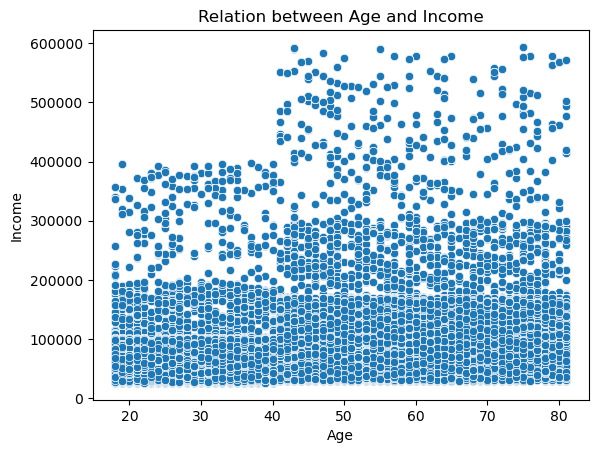

In [27]:
scatter = sns.scatterplot(x='Age', y='Income', data=df_4)
plt.title('Relation between Age and Income')
plt.show()

# After age 40, there is a drastic increase in the income. 

# Export the charts to local folder

In [28]:
scatter.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Scatter_Income_Age.png'))

In [29]:
line1.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'line_Age_Number_of_Dependent.png'))

In [27]:
line.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'line_Department_Vs_orders.png'))

In [32]:
hist.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Hist_order_hour_of_day'))